# Data Cleaning

In [3]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
#Reading and filtering files
games = pd.read_csv('Raw_Data\games.csv') #, index_col=['date'])
header = ['date','attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'weather', 'wind', 'delay']
games = games[7287:][header]   #only 2018 data is analyzed

#formatting dates to only month and date for the 2018 data
dates = pd.DatetimeIndex(games.date)
dates = dates.strftime('%B-%d')
games.date = dates

games.head()

,date,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay
7287,March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0
7288,March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0
7289,March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0
7290,March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0
7291,March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0


In [5]:
#Data Cleaning

#Venue_name of 'Angel Stadium' and 'Angel Stadium of Anaheim' are the same, will merge to be 'Angel Stadium'
games.venue_name[games.venue_name == 'Angel Stadium of Anaheim'] = 'Angel Stadium'

#The following three stadiums have less than 5 data points. Will be removed from this dataframe
#Stadiums: 'Hiram Bithorn Stadium', 'Estadio de Beisbol Monterrey', 'BB&T Ballpark'
index_name = games[games.venue_name == 'Hiram Bithorn Stadium'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'Estadio de Beisbol Monterrey'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'BB&T Ballpark'].index
games.drop(index_name, inplace=True)
#games[games.venue_name == 'Hiram Bithorn Stadium']

len(games.venue_name.unique())


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


30

In [6]:
#Creating Column for Temperatures only
temps = []
for each in games['weather']:
    temps.append(int(each.split(' ')[0]))
games['temperature'] = temps

#Creating Column for Weather condition only
weather_type = []
for each in games['weather']:
    weather_type.append(each.split('degrees, ')[1])
games['weather_type'] = weather_type

#Creating Column for Wind Speed only
wind_speed = []
for each in games['wind']:
    wind_speed.append(int(each.split(' mph,')[0]))
games['wind_speed_mph'] = wind_speed

games.head()

,date,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,temperature,weather_type,wind_speed_mph
7287,March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0,73,partly cloudy,2
7288,March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0,72,dome,0
7289,March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0,45,overcast,10
7290,March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0,75,partly cloudy,16
7291,March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0,55,cloudy,2


# Wind Analysis
Does weather affect the attendance of a game?

What weather conditions are each field most likely to have? 

What are the optimal weather conditions to win a game? (Based on team strengths?)  (find out mean temps for specific stadiums and see if team scores more at those temperatures at other stadiums)

How does elapsed time of a game vary with the weather conditions? Are specific fields more liekly to experience delays?

In [7]:
"""headers = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'weather', 'wind', 'delay', 'temperature', 'weather_type', 'wind_speed_mph']"""
games.venue_name.unique()
venues = list(games.venue_name.unique())
len(venues)

30

In [8]:
header2 = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'delay', 'wind_speed_mph']

by_venue = games[header2].groupby('venue_name')
by_venue.get_group('Angel Stadium')

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,delay,wind_speed_mph
7341,43904,6,cle,205,0,ana,7:07 PM,Angel Stadium,0,7
7352,35007,2,cle,169,13,ana,7:08 PM,Angel Stadium,0,4
7364,32412,2,cle,268,3,ana,1:08 PM,Angel Stadium,0,6
7390,36023,9,oak,215,13,ana,7:07 PM,Angel Stadium,0,4
7403,40129,7,oak,200,3,ana,6:08 PM,Angel Stadium,0,8
...,...,...,...,...,...,...,...,...,...,...
9645,36308,1,tex,181,4,ana,7:09 PM,Angel Stadium,0,5
9661,35991,2,tex,161,3,ana,7:07 PM,Angel Stadium,0,7
9679,35041,5,oak,197,8,ana,7:08 PM,Angel Stadium,0,7
9695,43762,5,oak,191,2,ana,6:09 PM,Angel Stadium,0,8


# Wind vs Attendance

Text(12, 38427, 'polyfit function')

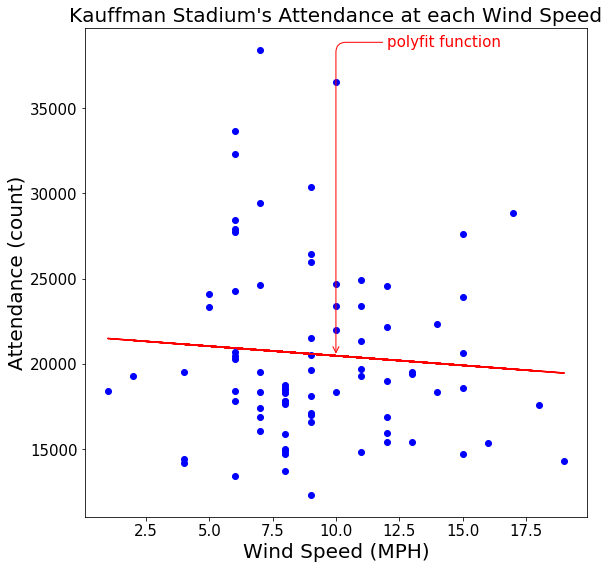

In [9]:
#Graphing wind speed versus attendance at one venue

fig, axs = plt.subplots(figsize=(9,9))

nopatterns=['Dodger Stadium', 'Wrigley Field', 'Safeco Field']
patterns=['Fenway Park', 'Kauffman Stadium', 'Marlins Park']

name = patterns[1]
x = by_venue.get_group(name).wind_speed_mph
y = by_venue.get_group(name).attendance
axs.scatter(x,y,color='b')

axs.set_title("{}'s Attendance at each Wind Speed".format(name),fontsize=20)
axs.set_xlabel('Wind Speed (MPH)', fontsize=20)
plt.xticks(fontsize=15, color='black')
axs.set_ylabel('Attendance (count)', fontsize=20)
plt.yticks(fontsize=15, color='black')

coef=np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
axs.plot(x,poly1d_fn(x), color='r')  

min_wind = games.wind_speed_mph[games.venue_name==name].min()
max_wind = games.wind_speed_mph[games.venue_name==name].max()
deltah=min_wind+(max_wind-min_wind)/2
att_at_wind = games.attendance[games.venue_name==name].max()

axs.annotate('polyfit function', xy=(int(deltah),int(poly1d_fn(deltah))), xytext=(max_wind-7,att_at_wind), fontsize=15,color='red',
             arrowprops=dict(arrowstyle='->',color='red', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='left', verticalalignment='bottom')

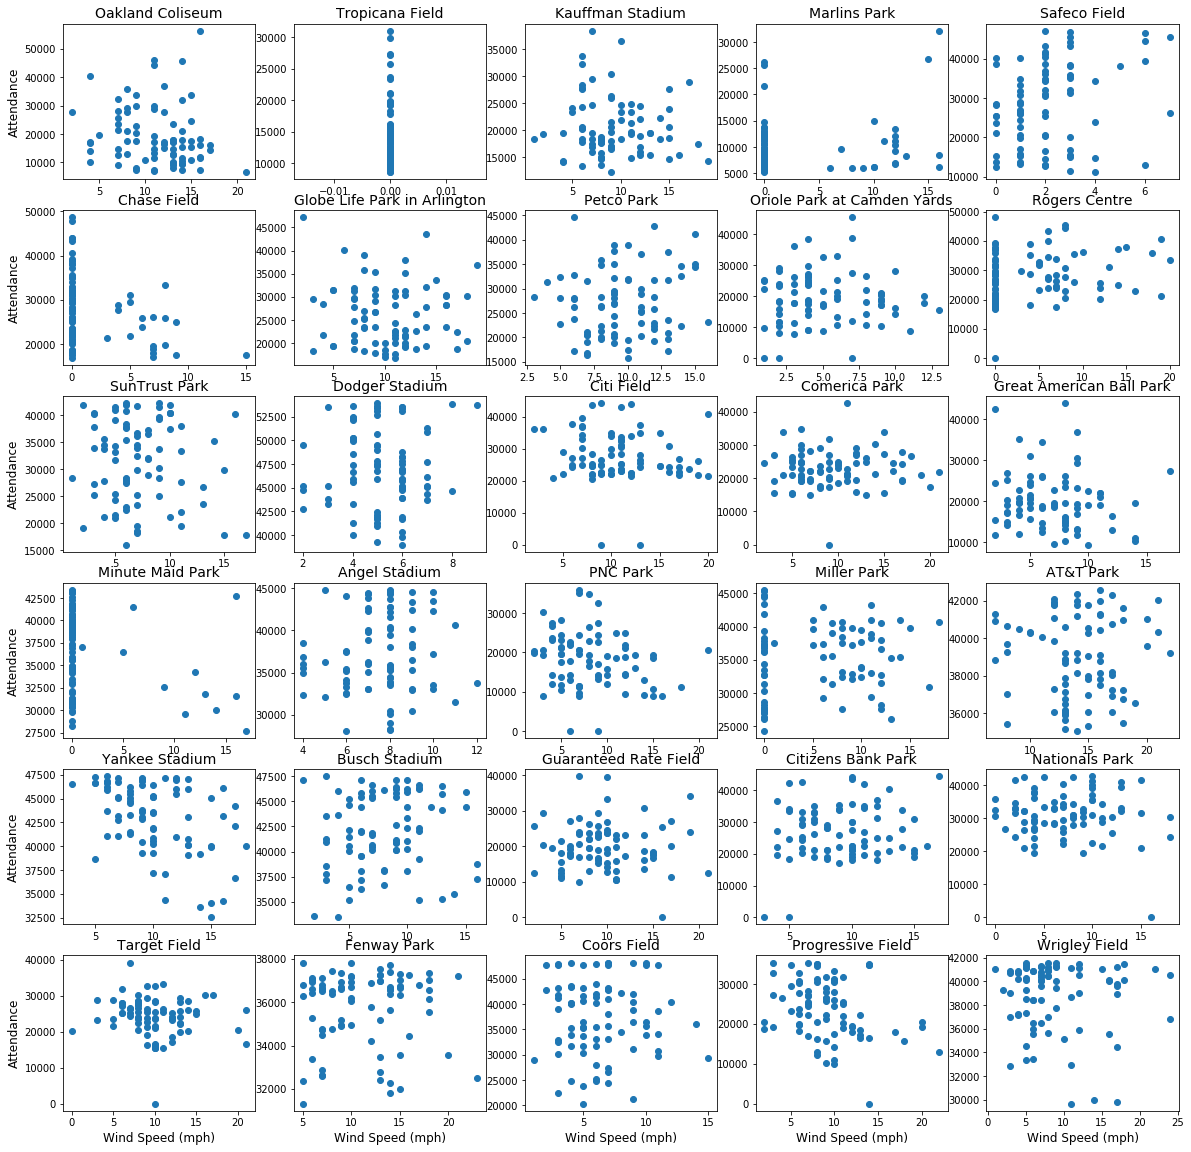

In [67]:
#Graphing wind versus attendance at each venue

fig, axs = plt.subplots(6,5, figsize=(20,20))
count=0

for i in range(0,6):
    for j in range(0,5):
        x = by_venue.get_group(venues[count]).wind_speed_mph
        y = by_venue.get_group(venues[count]).attendance
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(venues[count], fontsize=14)
        axs[i,0].set_ylabel('Attendance', fontsize=12)
        axs[5,j].set_xlabel('Wind Speed (mph)', fontsize=12)
        
        #coef=np.polyfit(x,y,1)
        #poly1d_fn = np.poly1d(coef)
        #axs[i,j].plot(x,poly1d_fn(x), color='r')    
        
        count+=1

# Wind vs Time (elapsed and delay)

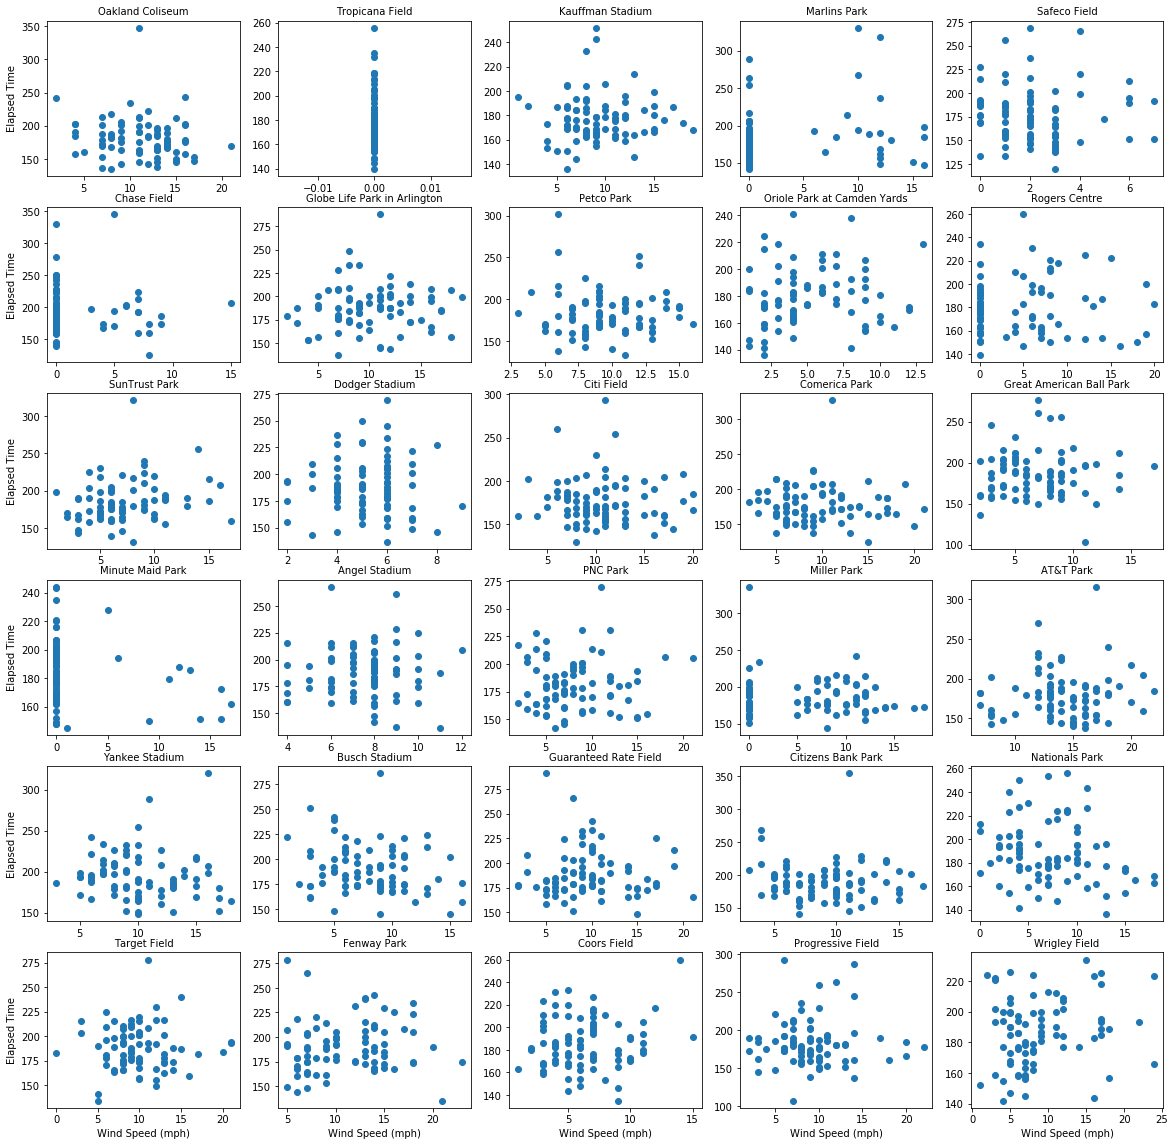

In [38]:
#Graphing wind versus elapsed time at each venue

fig, axs = plt.subplots(6,5, figsize=(20,20))
count=0

for i in range(0,6):
    for j in range(0,5):
        x = by_venue.get_group(venues[count]).wind_speed_mph
        y = by_venue.get_group(venues[count]).elapsed_time
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(venues[count], fontsize=10)
        axs[i,0].set_ylabel('Elapsed Time', fontsize=10)
        axs[5,j].set_xlabel('Wind Speed (mph)', fontsize=10)

        #coef=np.polyfit(x,y,1)
        #poly1d_fn = np.poly1d(coef)
        #axs[i,j].plot(x,poly1d_fn(x), color='r')    
        
        count+=1

Text(6.5, 135, 'Avg Delay=68min')

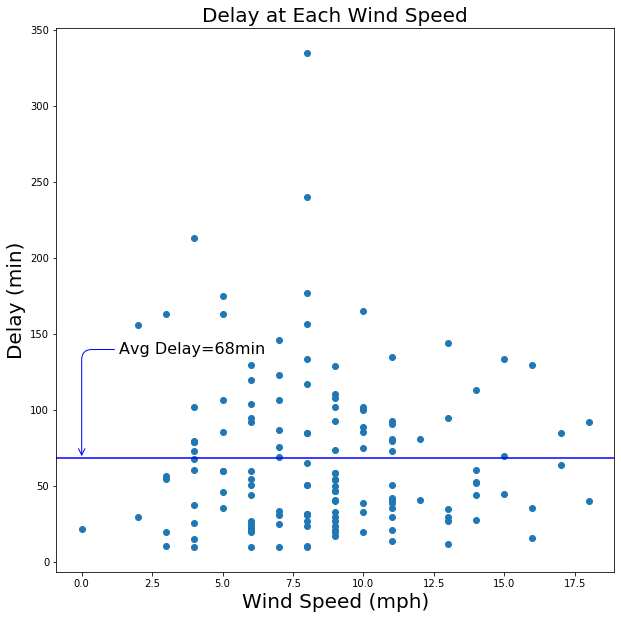

In [72]:
#Graphing wind versus elapsed time at all venues

games_rmv_outdelay = games[(games.delay!=1860) & (games.delay > 0)]    #remove the outlier of 1860 since it looks wildly different from other games

fig, axs = plt.subplots(figsize=(10,10))

x=games.wind_speed_mph
y=games.delay
x=games_rmv_outdelay.wind_speed_mph
y=games_rmv_outdelay.delay
axs.scatter(x,y)

axs.set_title('Delay at Each Wind Speed',fontsize=20)
axs.set_xlabel('Wind Speed (mph)', fontsize=20)
axs.set_ylabel('Delay (min)', fontsize=20)

y_average=games[(games.delay < 1700) & (games.delay > 0)].delay.mean()
plt.axhline(y=y_average, color='b')

axs.annotate('Avg Delay={}min'.format(int(y_average)), xy=(0,y_average), xytext=(6.5,135), fontsize=16, 
             arrowprops=dict(arrowstyle='->',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')     

Text(22, 110, 'Average Elapsed Time=184min')

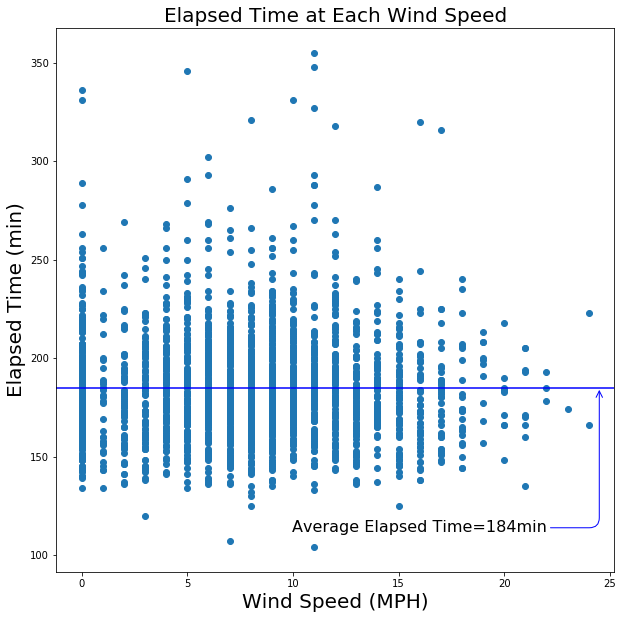

In [71]:
#Graphing wind versus delay at all venues

fig, axs = plt.subplots(figsize=(10,10))

x=games.wind_speed_mph
y=games.elapsed_time
axs.scatter(x,y)

axs.set_title('Elapsed Time at Each Wind Speed',fontsize=20)
axs.set_xlabel('Wind Speed (MPH)', fontsize=20)
axs.set_ylabel('Elapsed Time (min)', fontsize=20)

y_average=games.elapsed_time.mean()
plt.axhline(y=y_average, color='b')

axs.annotate('Average Elapsed Time={}min'.format(int(y_average)), xy=(24.5,y_average), xytext=(22,110), fontsize=16, 
             arrowprops=dict(arrowstyle='->',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')      

In [41]:
by_venue_mean = games[header2].groupby('venue_name').mean()
by_venue_mean.head()

,attendance,away_final_score,elapsed_time,home_final_score,delay,wind_speed_mph
venue_name,,,,,,
AT&T Park,"38,965.25",4.12,179.06,3.96,0.20,14.12
Angel Stadium,"37,286.62",4.38,188.31,4.38,0.58,7.57
Busch Stadium,"42,019.59",4.27,189.99,4.33,30.42,7.94
Chase Field,"27,687.59",4.05,192.98,4.43,0.27,1.60
Citi Field,"27,469.10",3.83,176.88,3.38,8.60,10.68


Text(0.5, 0, 'wind speed(MPH)')

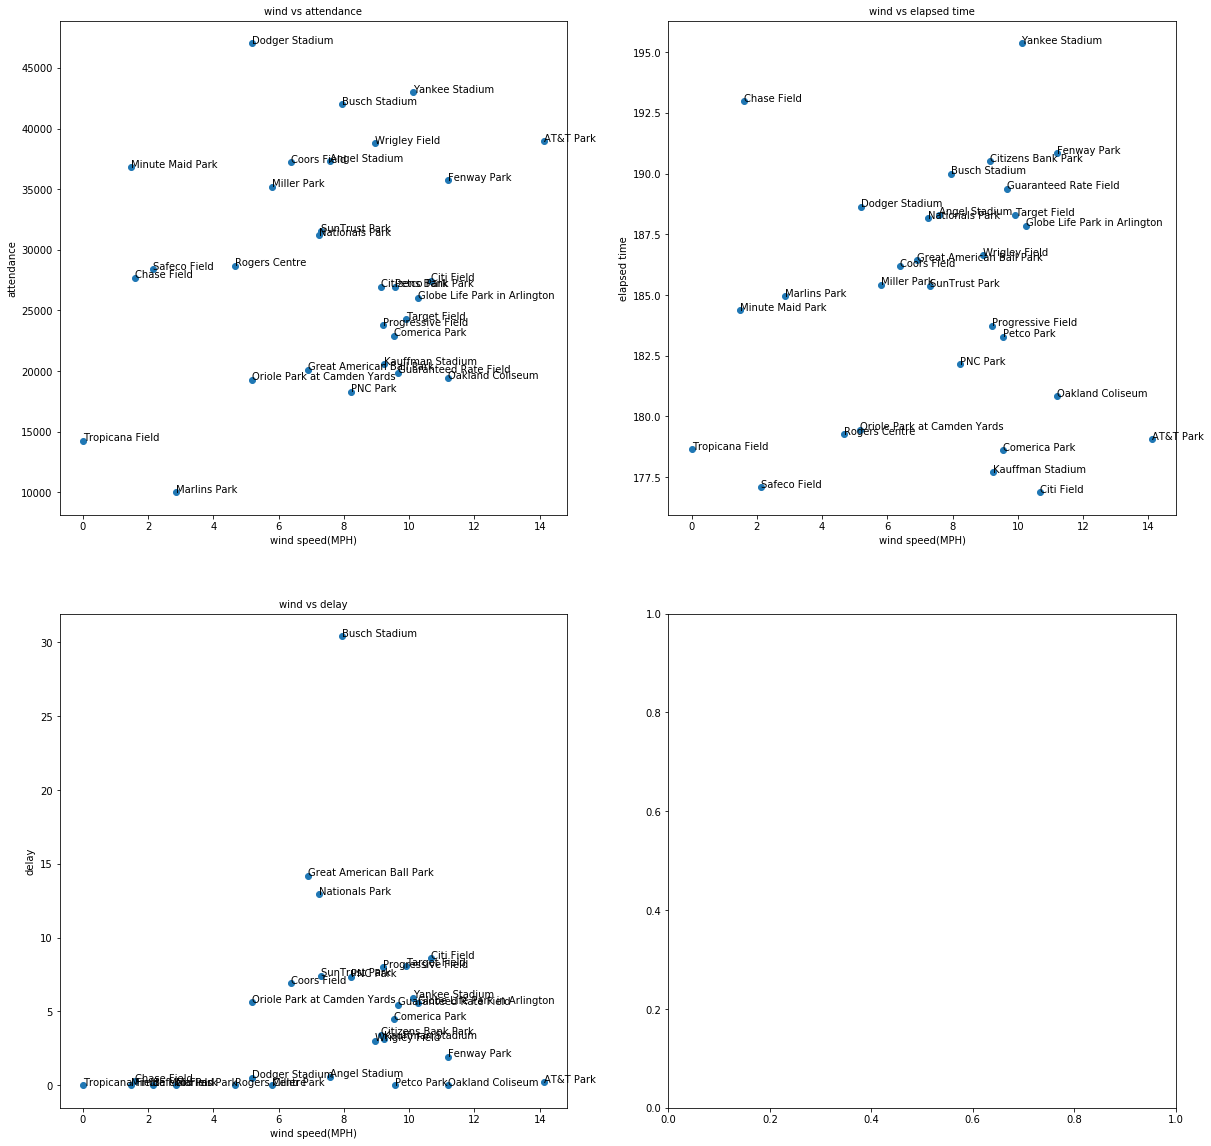

In [15]:
fig, axs = plt.subplots(2,2, figsize=(20,20))

#Graphing mean wind speed versus mean attendance at each venue
x = by_venue_mean.wind_speed_mph
y = by_venue_mean.attendance
axs[0,0].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[0,0].annotate(txt, xy=(x[i],y[i]))
axs[0,0].set_title('wind vs attendance', fontsize=10)
axs[0,0].set_ylabel('attendance', fontsize=10)
axs[0,0].set_xlabel('wind speed(MPH)', fontsize=10)
    
#Graphing mean wind speed versus mean elapsed time at each venue
x = by_venue_mean.wind_speed_mph
y = by_venue_mean.elapsed_time
axs[0,1].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[0,1].annotate(txt, xy=(x[i],y[i]))
axs[0,1].set_title('wind vs elapsed time', fontsize=10)
axs[0,1].set_ylabel('elapsed time', fontsize=10)
axs[0,1].set_xlabel('wind speed(MPH)', fontsize=10)
     
#Graphing mean wind speed versus mean delay at each venue
x = by_venue_mean.wind_speed_mph
y = by_venue_mean.delay
axs[1,0].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[1,0].annotate(txt, xy=(x[i],y[i]))    
axs[1,0].set_title('wind vs delay', fontsize=10)
axs[1,0].set_ylabel('delay', fontsize=10)
axs[1,0].set_xlabel('wind speed(MPH)', fontsize=10)


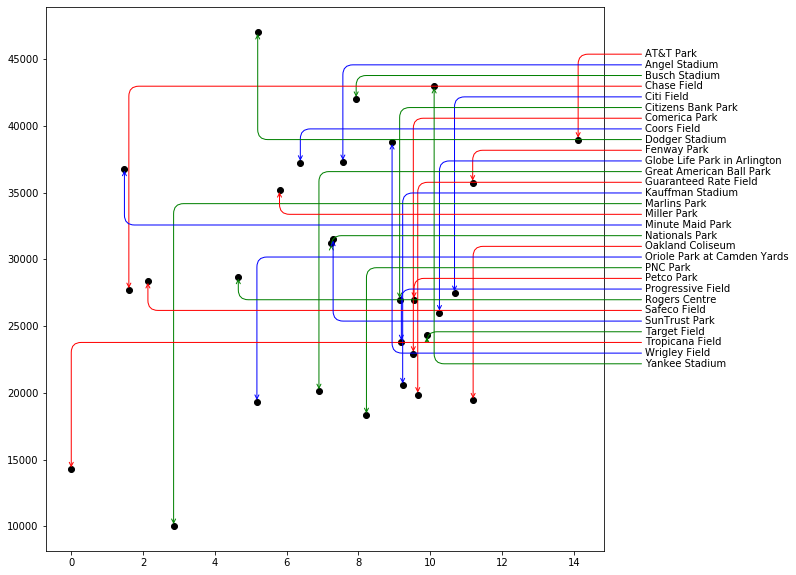

In [16]:
#Graphing mean wind versus mean elapsed time at each venue

fig, axs = plt.subplots(figsize=(10,10))
x = by_venue_mean.wind_speed_mph
y = by_venue_mean.attendance
axs.scatter(x, y, color='black')
j=0
k=0
colors = ['r','b','g','r','b','g','r','b','g','r','b','g','r','b','g',
          'r','b','g','r','b','g','r','b','g','r','b','g','r','b','g']

for i, txt in enumerate(by_venue_mean.index):
    axs.annotate(txt, xy=(x[i],y[i]), xytext=(16,45000-j), arrowprops=dict(arrowstyle='->',color=colors[k], connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
                 horizontalalignment='left', verticalalignment='bottom')
    j+=800
    k+=1

# Wind vs Venue

In [76]:
by_venue_wind_mean = games[header2].groupby('venue_name').wind_speed_mph.agg(['mean']).sort_values('mean', ascending=False)
aa=by_venue_wind_mean.head(5)
aa.columns=['Top 5 Avg. Wind Speed (mph)']
aa

,Top 5 Avg. Wind Speed (mph)
venue_name,
AT&T Park,14.12
Oakland Coliseum,11.20
Fenway Park,11.19
Citi Field,10.68
Globe Life Park in Arlington,10.26


In [17]:
#Creating a dictionary of home games and team names
by_home_team = games.groupby('home_team')
team=list(games.home_team.unique())
team_venue_name = {}  #the dictionary
for each in team:
    team_venue_name[each] = [str(by_home_team.get_group(each).venue_name.unique())[2:-2]]
print(team_venue_name)

{'oak': ['Oakland Coliseum'], 'tba': ['Tropicana Field'], 'kca': ['Kauffman Stadium'], 'mia': ['Marlins Park'], 'sea': ['Safeco Field'], 'ari': ['Chase Field'], 'tex': ['Globe Life Park in Arlington'], 'sdn': ['Petco Park'], 'bal': ['Oriole Park at Camden Yards'], 'tor': ['Rogers Centre'], 'atl': ['SunTrust Park'], 'lan': ['Dodger Stadium'], 'nyn': ['Citi Field'], 'det': ['Comerica Park'], 'cin': ['Great American Ball Park'], 'hou': ['Minute Maid Park'], 'ana': ['Angel Stadium'], 'pit': ['PNC Park'], 'mil': ['Miller Park'], 'sfn': ['AT&T Park'], 'nya': ['Yankee Stadium'], 'sln': ['Busch Stadium'], 'cha': ['Guaranteed Rate Field'], 'phi': ['Citizens Bank Park'], 'was': ['Nationals Park'], 'min': ['Target Field'], 'bos': ['Fenway Park'], 'col': ['Coors Field'], 'cle': ['Progressive Field'], 'chn': ['Wrigley Field']}


Text(-3, 6, 'avg away score=3.48')

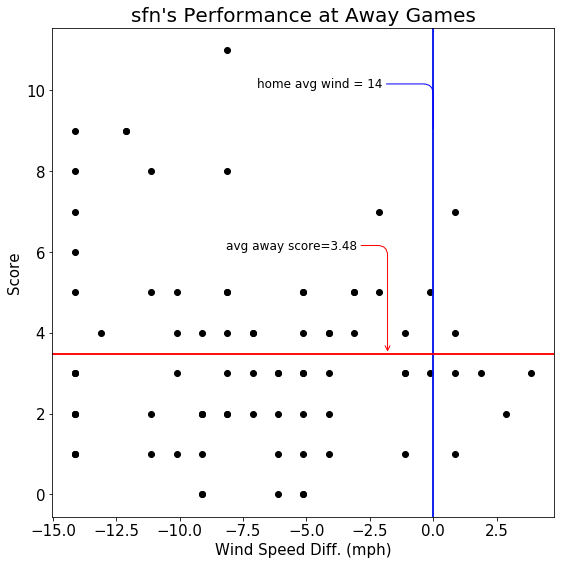

In [77]:
#Performance of San Francisco Giants at all other venues (assumes that Giants play well in 63 degree weather)
by_away_team = games.groupby('away_team')

name='sfn'
team_home_venue_avg_wind = float(by_venue_mean.wind_speed_mph[by_venue_mean.index == team_venue_name[name][0]])
avg_away_score = games[games.away_team == name].away_final_score.mean()

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(figsize=(9,9))
x = by_away_team.get_group(name).wind_speed_mph - team_home_venue_avg_wind
y = by_away_team.get_group(name).away_final_score
y_average = by_away_team.get_group(name).away_final_score.mean()

axs.scatter(x, y, color='black')
axs.axvline(x=0)
plt.axhline(y=y_average, color='r')

axs.set_title("{}'s Performance at Away Games".format(name), fontsize=20)
axs.set_xlabel('Wind Speed Diff. (mph)', fontsize=15)
axs.set_ylabel('Score', fontsize=15)
axs.axvline(x=0, color='b')
axs.axhline(y=y_average, color='r') 
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
        
axs.annotate('home avg wind = {}'.format(int(team_home_venue_avg_wind)), xy=(0,9), xytext=(-2,10), fontsize=12, 
             arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')      

axs.annotate('avg away score={:.2f}'.format(avg_away_score), xy=(-1.8,avg_away_score), xytext=(-3,6), fontsize=12,
            arrowprops=dict(arrowstyle='->',color='r', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')  

Text(-2.5, 6.2, 'avg away score=3.77')

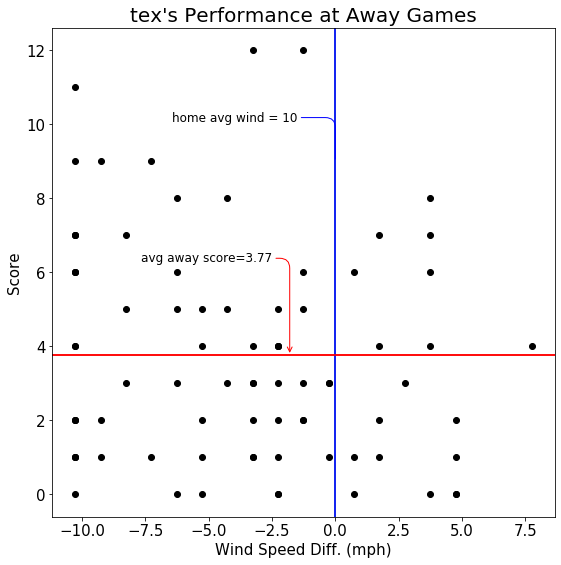

In [78]:
#Performance of San Francisco Giants at all other venues (assumes that Giants play well in 63 degree weather)
by_away_team = games.groupby('away_team')

name='tex'
team_home_venue_avg_wind = float(by_venue_mean.wind_speed_mph[by_venue_mean.index == team_venue_name[name][0]])
avg_away_score = games[games.away_team == name].away_final_score.mean()

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(figsize=(9,9))
x = by_away_team.get_group(name).wind_speed_mph - team_home_venue_avg_wind
y = by_away_team.get_group(name).away_final_score
y_average = by_away_team.get_group(name).away_final_score.mean()

axs.scatter(x, y, color='black')
axs.axvline(x=0)
plt.axhline(y=y_average, color='r')

axs.set_title("{}'s Performance at Away Games".format(name), fontsize=20)
axs.set_xlabel('Wind Speed Diff. (mph)', fontsize=15)
axs.set_ylabel('Score', fontsize=15)
axs.axvline(x=0, color='b')
axs.axhline(y=y_average, color='r') 
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
        
axs.annotate('home avg wind = {}'.format(int(team_home_venue_avg_wind)), xy=(0,9), xytext=(-1.5,10), fontsize=12, 
             arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')      

axs.annotate('avg away score={:.2f}'.format(avg_away_score), xy=(-1.8,avg_away_score), xytext=(-2.5,6.2), fontsize=12,
            arrowprops=dict(arrowstyle='->',color='r', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')  

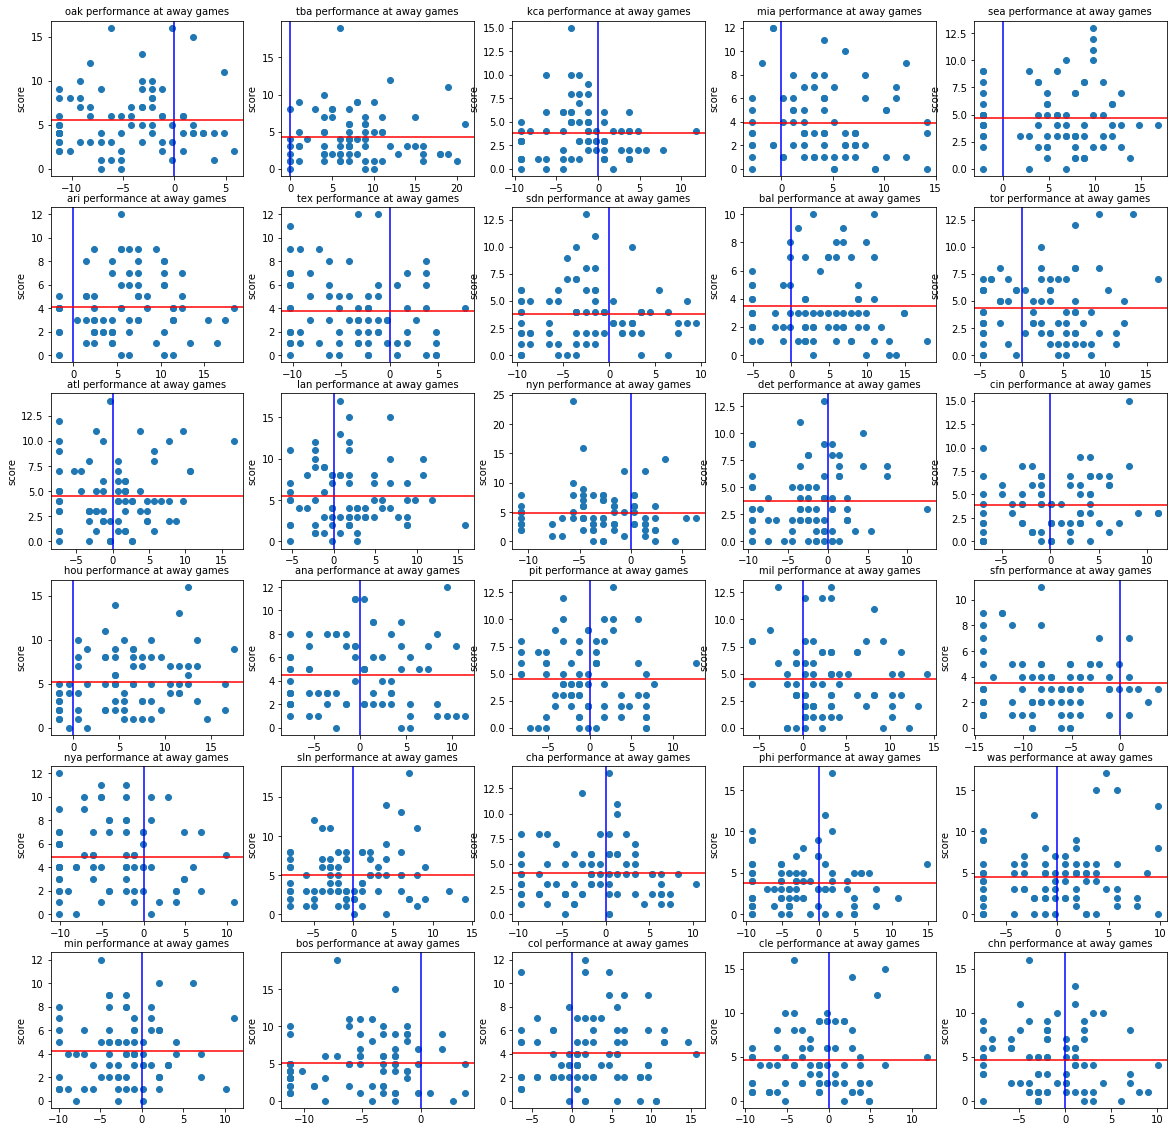

In [42]:
teams=list(team_venue_name.keys())
#Performance of each team at all other venues (assumes that each team plays well in their own venue's average degree weather)
by_away_team = games.groupby('away_team')

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(6,5, figsize=(20,20))
count = 0

for i in range(0,6):
    for j in range(0,5):
        team_home_venue_avg_wind = float(by_venue_mean.wind_speed_mph[by_venue_mean.index == team_venue_name[teams[count]][0]])

        x = by_away_team.get_group(teams[count]).wind_speed_mph - team_home_venue_avg_wind
        y = by_away_team.get_group(teams[count]).away_final_score
        y_average = by_away_team.get_group(teams[count]).away_final_score.mean()
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(teams[count]+' performance at away games', fontsize=10)
        axs[i,j].set_ylabel('score', fontsize=10)
        axs[i,j].axvline(x=0, color='b')
        axs[i,j].axhline(y=y_average, color='r')        
        
#         axs[i,j].annotate("team's avg wind speed", xy=(0,12), xytext=(-2,12), 
#                      arrowprops=dict(arrowstyle='->',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
#                      horizontalalignment='right', verticalalignment='bottom')        
        count+=1

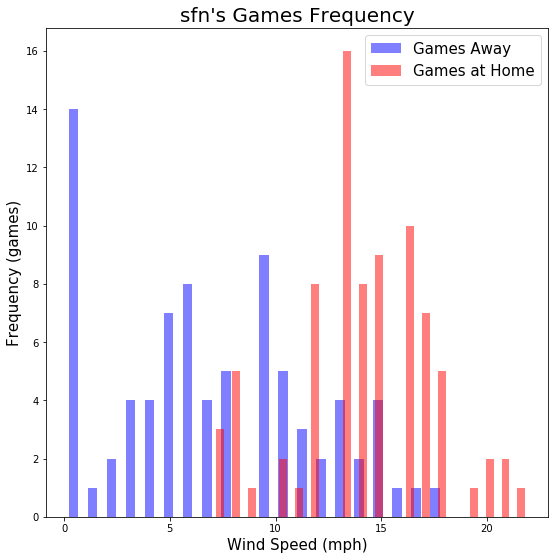

In [81]:
#Histogram of specific teams' away games's average wind speed
by_away_team = games.groupby('away_team')
by_home_team = games.groupby('home_team')
name='sfn'

#Histogram of specific team's away games' temperatures
fig, axs = plt.subplots(figsize=(9,9))
axs.hist(by_away_team.get_group(name).wind_speed_mph, bins=20, color='b', rwidth=0.5, alpha=0.5)
axs.hist(by_home_team.get_group(name).wind_speed_mph, bins=20, color='r', rwidth=0.5, alpha=0.5)

#Labeling
axs.set_title("{}'s Games Frequency".format(name), fontsize=20)
axs.set_ylabel('Frequency (games)', fontsize=15)
axs.set_xlabel('Wind Speed (mph)', fontsize=15)
plt.legend(['Games Away','Games at Home'], fontsize=15)

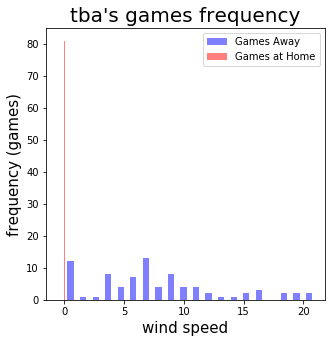

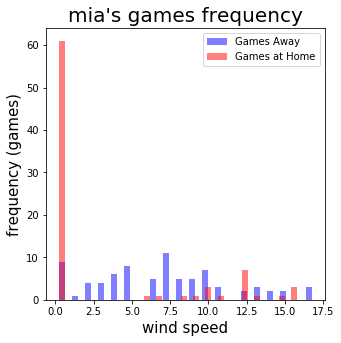

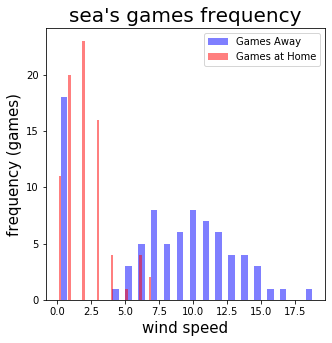

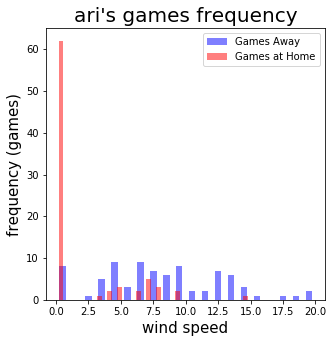

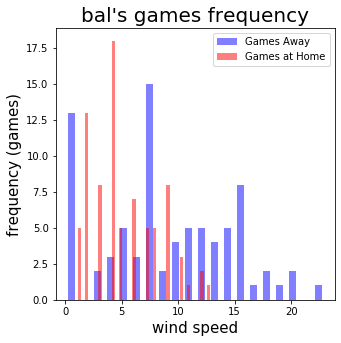

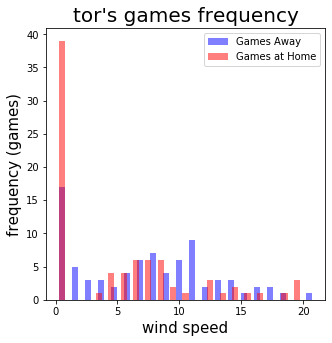

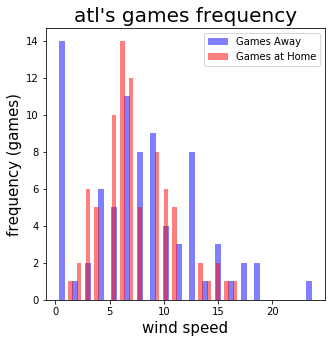

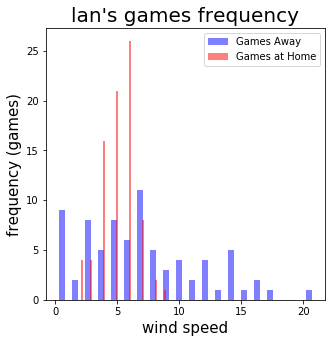

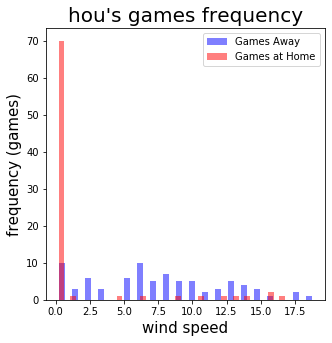

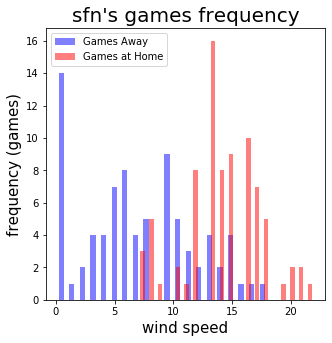

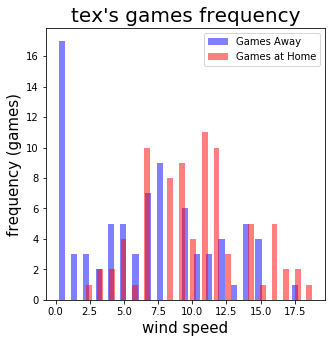

In [66]:
names = ['tba','mia','sea','ari', 'bal', 'tor', 'atl', 'lan', 'hou','sfn', 'tex']

for i in names:
    #Histogram of specific teams' away games's average wind speed
    by_away_team = games.groupby('away_team')
    by_home_team = games.groupby('home_team')
    name=i

    #Histogram of specific team's away games' temperatures
    fig, axs = plt.subplots(figsize=(5,5))
    axs.hist(by_away_team.get_group(name).wind_speed_mph, bins=20, color='b', rwidth=0.5, alpha=0.5)
    axs.hist(by_home_team.get_group(name).wind_speed_mph, bins=20, color='r', rwidth=0.5, alpha=0.5)

    #Labeling
    axs.set_title("{}'s games frequency".format(name), fontsize=20)
    axs.set_ylabel('frequency (games)', fontsize=15)
    axs.set_xlabel('wind speed', fontsize=15)
    plt.legend(['Games Away','Games at Home'])

# Wind vs Attendance

Text(0.5, 0, 'Wind (MPH)')

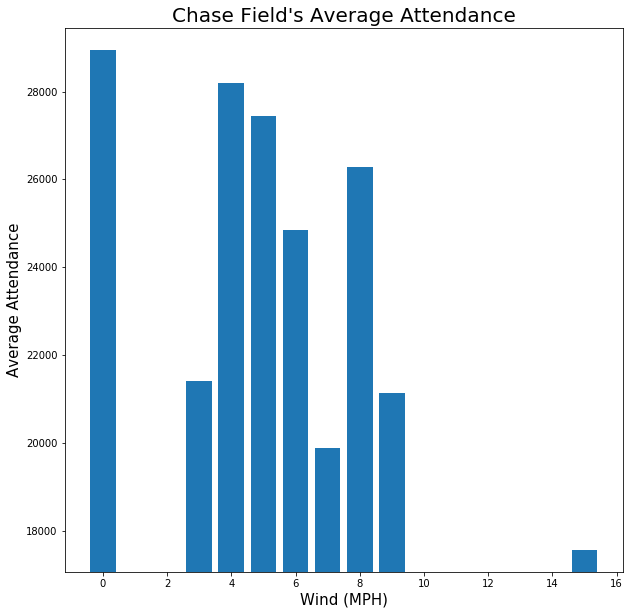

In [22]:
# average audience at each wind speed
by_venue = games.groupby('venue_name')
name='Chase Field'

max_attendance = by_venue.get_group(name).attendance.max()

df1 = pd.DataFrame(by_venue.get_group(name).attendance)
df2 = pd.DataFrame(by_venue.get_group(name).wind_speed_mph)

venue_attendance_wind_withindex = pd.merge(df1,df2, on=df1.index).set_index('wind_speed_mph')
venue_attendance_wind = venue_attendance_wind_withindex.drop(['key_0'], axis=1)
venue_attendance_wind = venue_attendance_wind.sort_index()

#gets average attendance for each dataframe and temperature input
def get_average(df,wind):
    d=df.groupby('wind_speed_mph')
    return d.get_group(wind).mean()

venue_attendance_wind.index.unique()

list_wind_attendance =[]  #a list of list of wind,avg attendance
for i in venue_attendance_wind.index.unique():
     list_wind_attendance.append([int(i),int(get_average(venue_attendance_wind,i))])

wind_avgatt = pd.DataFrame(list_wind_attendance, columns=['wind_speed_mph','average_attendance']).set_index('wind_speed_mph')
mn_att = wind_avgatt.average_attendance.min()
mx_att = wind_avgatt.average_attendance.max()

fig, axs = plt.subplots(figsize=(10,10))
axs.bar(wind_avgatt.index, wind_avgatt.average_attendance)
axs.set_ylim([mn_att-500,mx_att+500])

#Labeling
axs.set_title("{}'s Average Attendance".format(name), fontsize=20)
axs.set_ylabel('Average Attendance', fontsize=15)
axs.set_xlabel('Wind (MPH)', fontsize=15)

In [23]:
venues = list(games.venue_name.unique())
print(venues)

['Oakland Coliseum', 'Tropicana Field', 'Kauffman Stadium', 'Marlins Park', 'Safeco Field', 'Chase Field', 'Globe Life Park in Arlington', 'Petco Park', 'Oriole Park at Camden Yards', 'Rogers Centre', 'SunTrust Park', 'Dodger Stadium', 'Citi Field', 'Comerica Park', 'Great American Ball Park', 'Minute Maid Park', 'Angel Stadium', 'PNC Park', 'Miller Park', 'AT&T Park', 'Yankee Stadium', 'Busch Stadium', 'Guaranteed Rate Field', 'Citizens Bank Park', 'Nationals Park', 'Target Field', 'Fenway Park', 'Coors Field', 'Progressive Field', 'Wrigley Field']


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


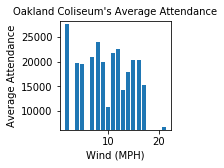

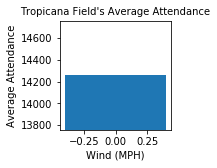

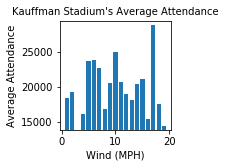

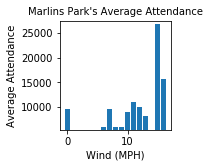

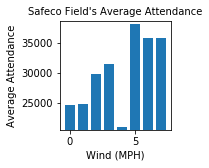

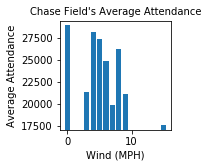

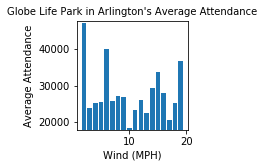

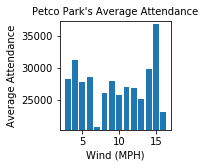

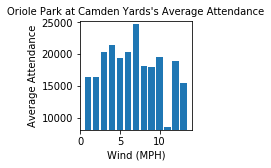

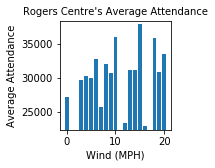

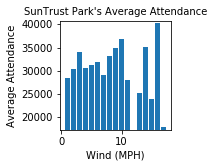

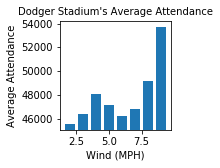

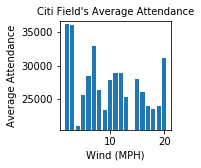

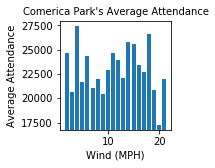

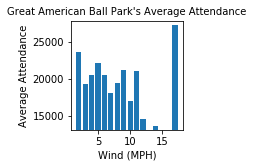

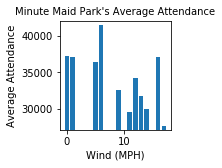

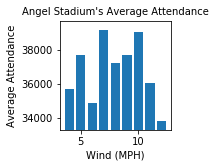

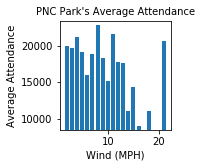

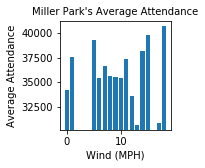

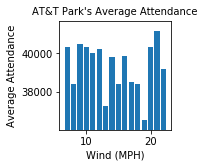

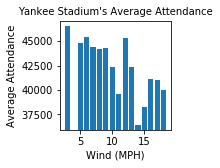

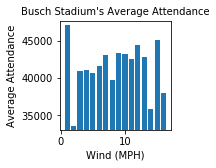

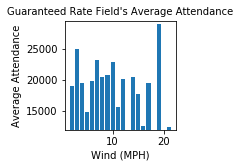

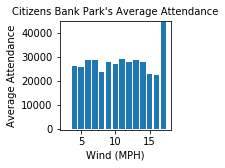

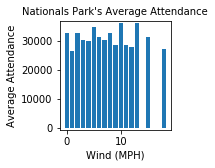

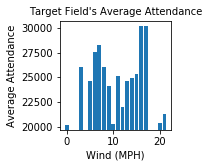

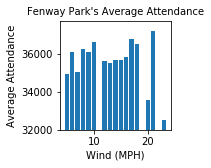

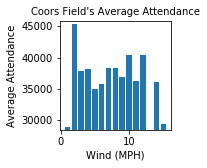

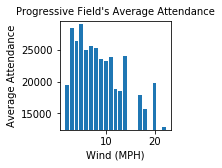

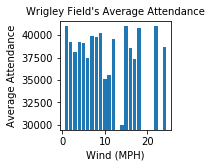

In [24]:
venues = list(games.venue_name.unique())

for i in venues:
    name=i

    # average audience at each wind speed
    by_venue = games.groupby('venue_name')
#     name='Chase Field'

    max_attendance = by_venue.get_group(name).attendance.max()

    df1 = pd.DataFrame(by_venue.get_group(name).attendance)
    df2 = pd.DataFrame(by_venue.get_group(name).wind_speed_mph)

    venue_attendance_wind_withindex = pd.merge(df1,df2, on=df1.index).set_index('wind_speed_mph')
    venue_attendance_wind = venue_attendance_wind_withindex.drop(['key_0'], axis=1)
    venue_attendance_wind = venue_attendance_wind.sort_index()

    #gets average attendance for each dataframe and temperature input
    def get_average(df,wind):
        d=df.groupby('wind_speed_mph')
        return d.get_group(wind).mean()

    venue_attendance_wind.index.unique()

    list_wind_attendance =[]  #a list of list of wind,avg attendance
    for i in venue_attendance_wind.index.unique():
         list_wind_attendance.append([int(i),int(get_average(venue_attendance_wind,i))])

    wind_avgatt = pd.DataFrame(list_wind_attendance, columns=['wind_speed_mph','average_attendance']).set_index('wind_speed_mph')
    mn_att = wind_avgatt.average_attendance.min()
    mx_att = wind_avgatt.average_attendance.max()

    fig, axs = plt.subplots(figsize=(2,2))
    axs.bar(wind_avgatt.index, wind_avgatt.average_attendance)
    axs.set_ylim([mn_att-500,mx_att+500])

    #Labeling
    axs.set_title("{}'s Average Attendance".format(name), fontsize=10)
    axs.set_ylabel('Average Attendance', fontsize=10)
    axs.set_xlabel('Wind (MPH)', fontsize=10)